# Different datasets using OpenCV Bilateral and Convlution/average filters
- See if chosen optimal parameters vary with respect to epsilon and scale values
<br>
Hypothesis: For Convolution Filter, optimal is 3x3 kernel (usually with denominator k^2-1 if we have sparse data). For Bilateral, optimal is d = 9, s = 70 
### Questions to consider
- How sensitive are filter to different data shapes (epsilon, scale)?
- Is there a sense of any limits as to when filtering will fail?

#### INFORMATION KNOWN
- domain size
- number of records/ scale (sparsity)
- epsilon

- Use more data sets, then perform data analysis 
- Get top ranking params
<br>
- Non-negative datasets are used as basically another dataset instance

In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import seaborn as sns
import os

%matplotlib inline
dpi = 256

In [6]:
def plotComparison(original, openCV_out, method):
    plt.subplot(121),plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB)),plt.title('Base')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv2.cvtColor(openCV_out, cv2.COLOR_BGR2RGB)),plt.title(method)
    plt.xticks([]), plt.yticks([])
    plt.show()

In [7]:
def save_256px(openCV_out, method):
    fig = plt.figure(figsize=(5, 5))
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    ax.imshow(cv2.cvtColor(openCV_out, cv2.COLOR_BGR2RGB))
    plt.savefig(method + '.png', pad_inches=0, dpi=dpi / 5.0)

In [8]:
vizDict= {
    "BJTaxi"  : "visualizations/BJTaxi", 
    "BOS"     : "visualizations/BOS", 
    "GOWALLA" : "visualizations/GOWALLA", 
    "US"      : "visualizations/US"
}

In [9]:
def getAllVisualizations(dataset):
    images = {}
    for filename in os.listdir(vizDict[dataset]):
        images[filename[:-4]] = cv2.imread(vizDict[dataset] + "/" + filename)
#         print(filename[:-4])
    return images
# print(os.path.basename("data/GOWALLA/in_1.0E+6.npy").strip('.npy'))


# Averaging
- Apply custom-made filters to images (2D convolution)

In [109]:
kernelSize = [2, 3, 5]
denom = [(2, 0), (2, 1), (3, 0)]

C:\Users\Xyoria\Anaconda3\envs\H499\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


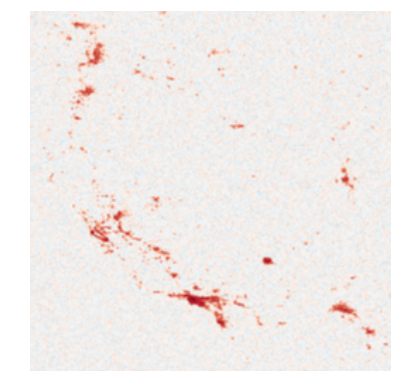

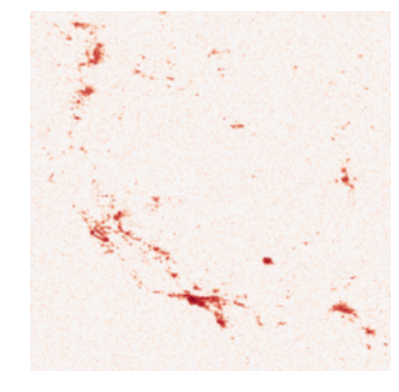

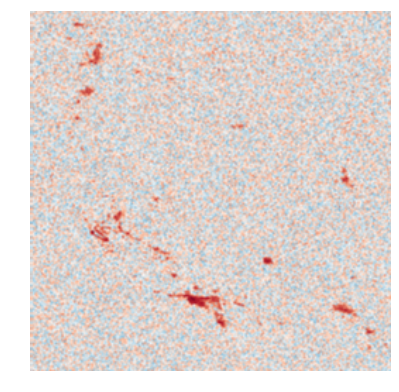

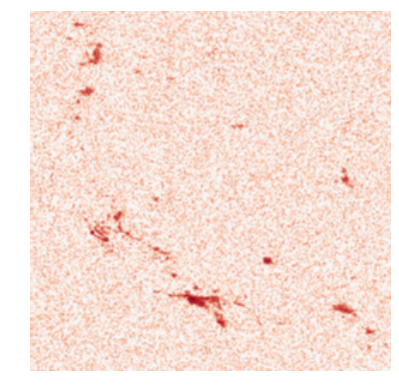

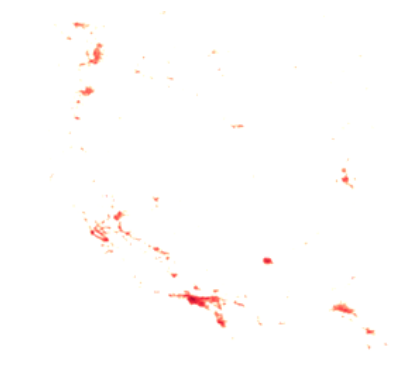

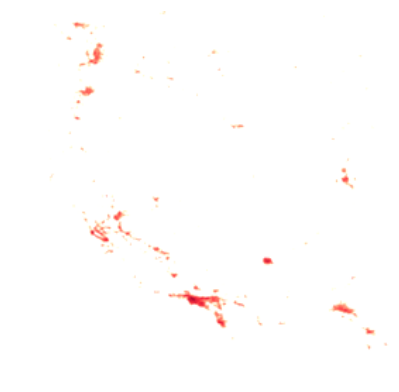

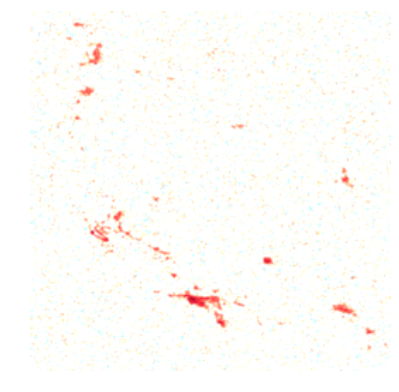

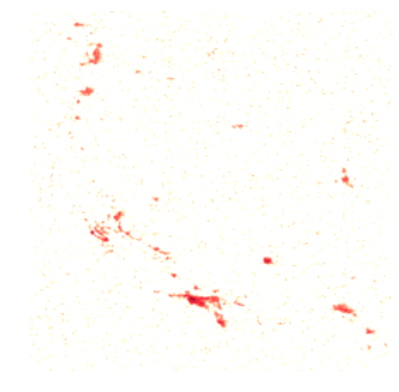

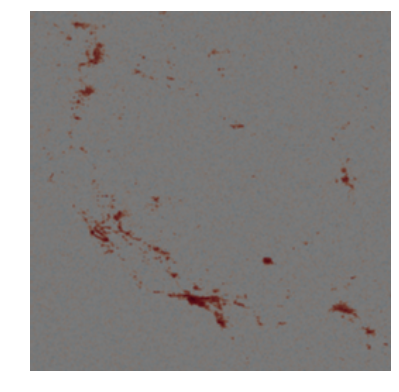

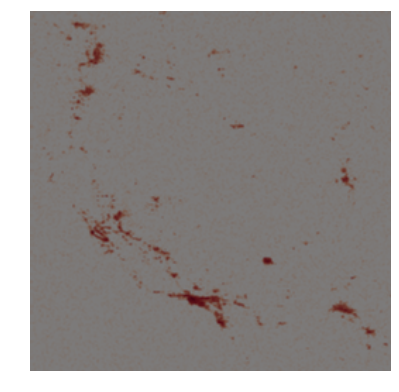

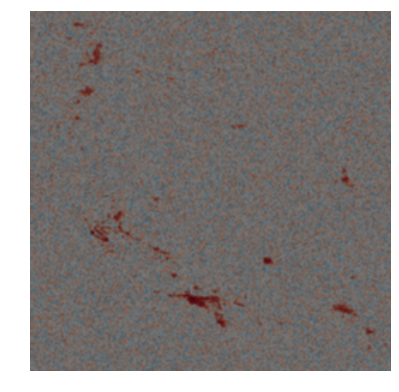

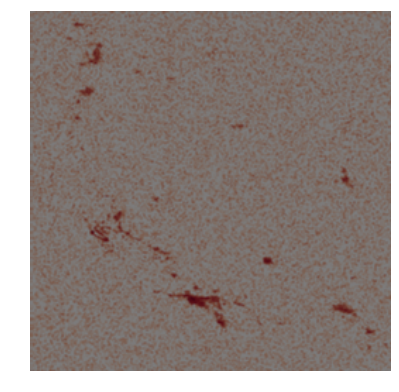

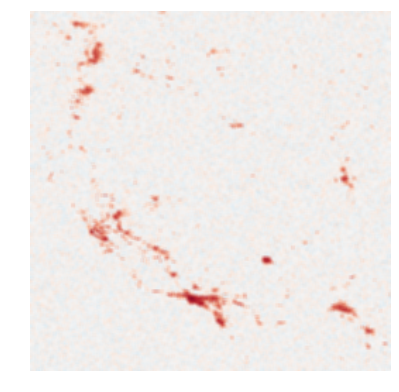

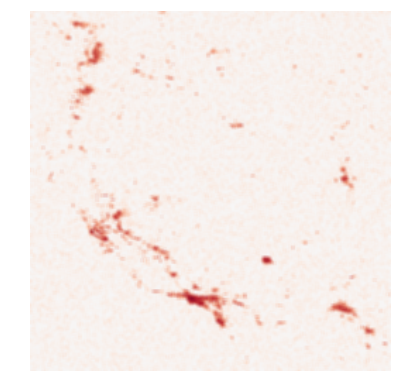

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


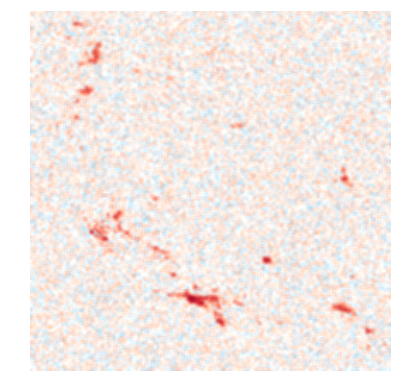

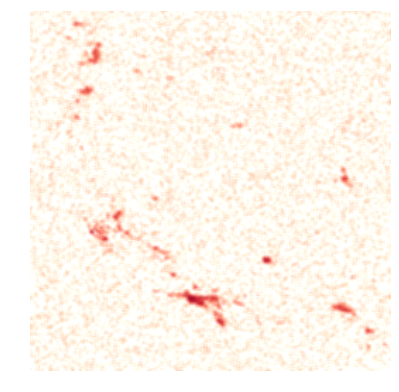

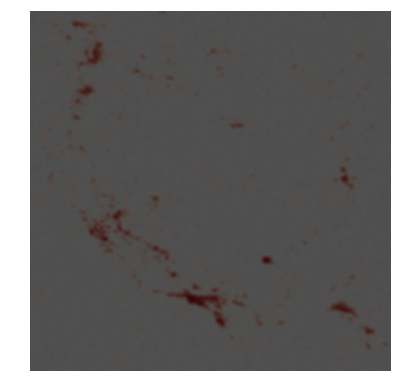

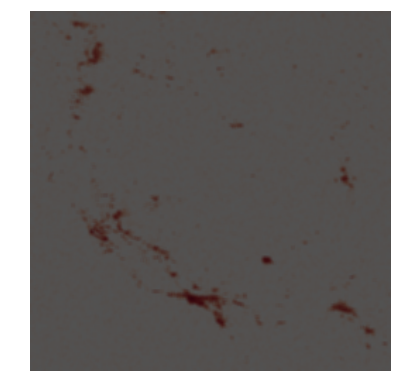

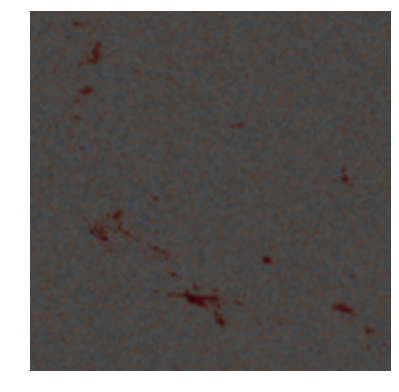

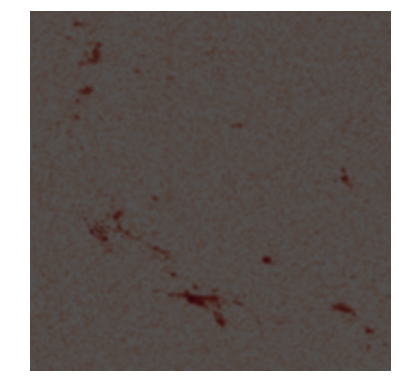

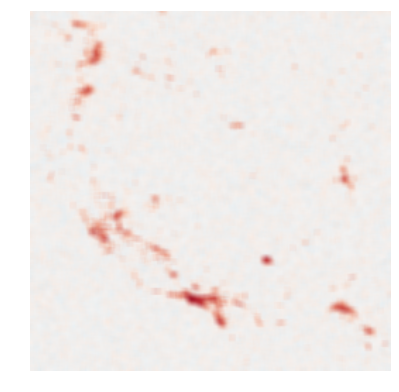

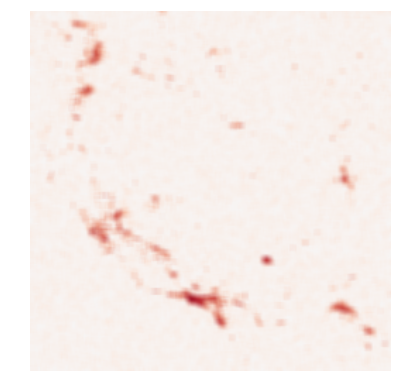

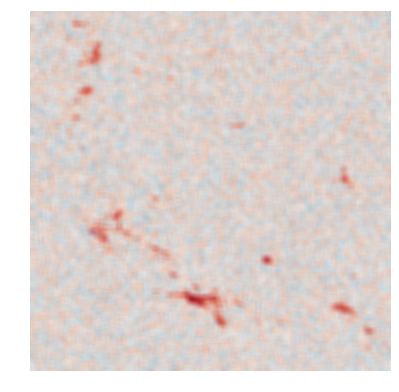

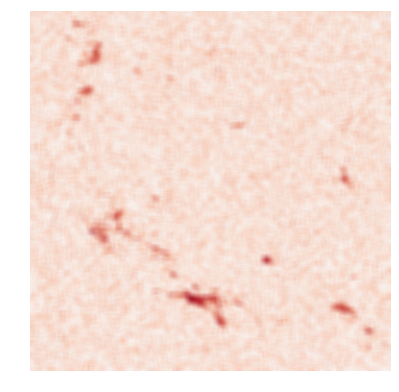

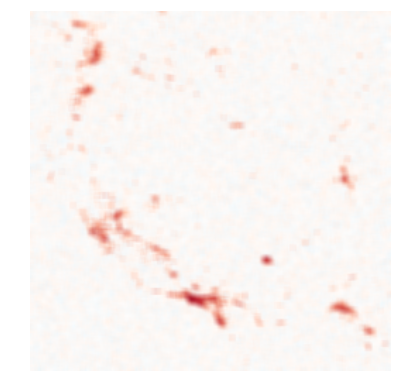

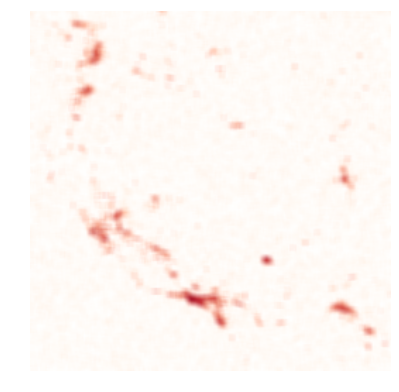

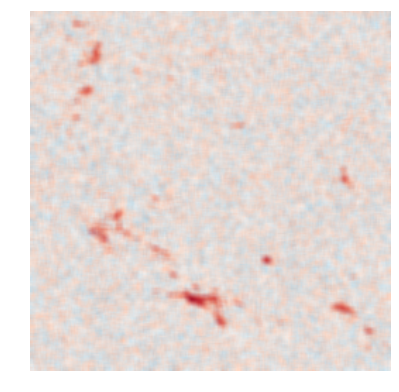

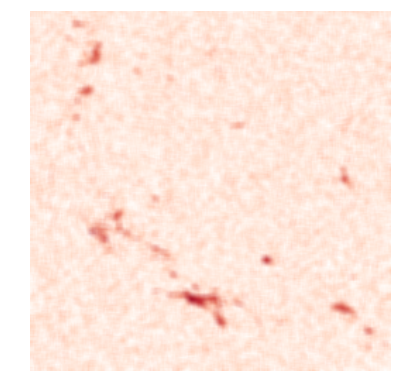

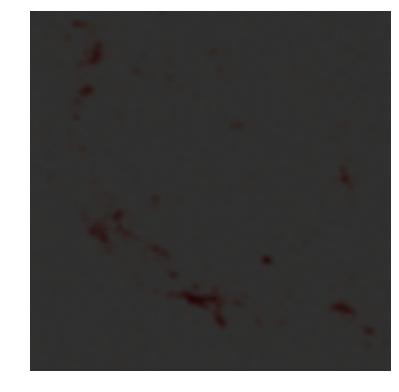

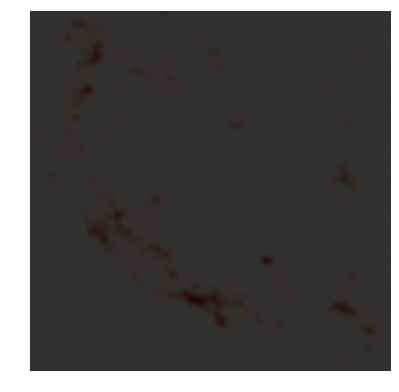

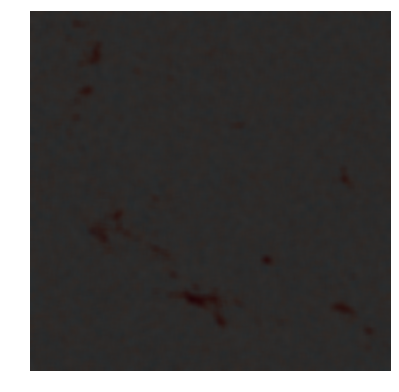

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [116]:
for k in kernelSize:
    for d in denom:
        images = getAllVisualizations("US")
        for i in images:
            if 'in' not in i:
                img = images[i]
                kernel = np.ones((k,k),np.float32)/(k**d[0]-d[1])
                dst = cv2.filter2D(img,-1,kernel)

                save_256px(dst, i + '_AVERAGED k = {} d = {}'.format(k, d))

# Bilateral

Python: cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]]) → dst

In [111]:
diameter = [3, 5, 9, 50]
sigmaColorSpace = [10, 50, 70, 150, 300]

In [ ]:
for d in diameter:
    for s in sigmaColorSpace:
        images = getAllVisualizations("US")
        for i in images:
            if 'in' not in i:
                img = images[i]
                dst = cv2.bilateralFilter(img,d,s,s)

                save_256px(dst, i + '_BILATERAL d = {} s = {}'.format(d, s))

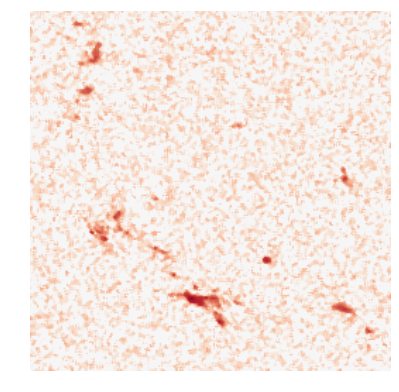

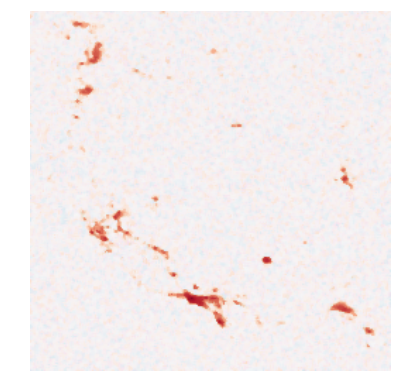

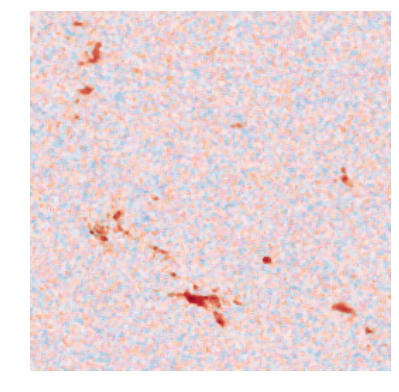

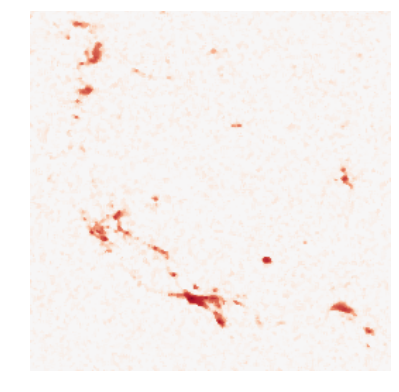

In [11]:
## Experimenting with median filter
#
# images = getAllVisualizations("US")
# for i in images:
#     if 'in' not in i:
#         img = images[i]
#         dst = cv2.medianBlur(img,3)

#         save_256px(dst, i + '_MEDIAN')
#
## END median filter exploration
